<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.3
# *KNN classification Lab*

**In this lab, we will:**
- Practice KNN classification on a dataset of breast cancer.
- Predict the `diagnoosis` of a patient from predictor variables of your choice.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [1]:
# IMPORT LIBRARIES

from itertools import combinations
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn import metrics

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [19]:
breast_cancer_csv = '/Users/francescafelizardo/Documents/Francesca/IOD - UTS - Data Analytics and AI Program/Modules/DATA/breast-cancer-wisconsin-data.csv'
breast=pd.read_csv(breast_cancer_csv,index_col='id')
breast

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           M        17.99         10.38          122.80     1001.0   
842517           M        20.57         17.77          132.90     1326.0   
84300903         M        19.69         21.25          130.00     1203.0   
84348301         M        11.42         20.38           77.58      386.1   
84358402         M        20.29         14.34          135.10     1297.0   
...            ...          ...           ...             ...        ...   
926424           M        21.56         22.39          142.00     1479.0   
926682           M        20.13         28.25          131.20     1261.0   
926954           M        16.60         28.08          108.30      858.1   
927241           M        20.60         29.33          140.10     1265.0   
92751            B         7.76         24.54           47.92      181.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760         0.30010   
842517            0.08474           0.07864         0.08690   
84300903          0.10960           0.15990         0.19740   
84348301          0.14250           0.28390         0.24140   
84358402          0.10030           0.13280         0.19800   
...                   ...               ...             ...   
926424            0.11100           0.11590         0.24390   
926682            0.09780           0.10340         0.14400   
926954            0.08455           0.10230         0.09251   
927241            0.11780           0.27700         0.35140   
92751             0.05263           0.04362         0.00000   

          concave points_mean  symmetry_mean  ...  texture_worst  \
id                                            ...                  
842302                0.14710         0.2419  ...          17.33   
842517                0.07017         0.1812  ...          23.41   
84300903              0.12790         0.2069  ...          25.53   
84348301              0.10520         0.2597  ...          26.50   
84358402              0.10430         0.1809  ...          16.67   
...                       ...            ...  ...            ...   
926424                0.13890         0.1726  ...          26.40   
926682                0.09791         0.1752  ...          38.25   
926954                0.05302         0.1590  ...          34.12   
927241                0.15200         0.2397  ...          39.42   
92751                 0.00000         0.1587  ...          30.37   

          perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
id                                                                           
842302             184.60      2019.0           0.16220            0.66560   
842517             158.80      1956.0           0.12380            0.18660   
84300903           152.50      1709.0           0.14440            0.42450   
84348301            98.87       567.7           0.20980            0.86630   
84358402           152.20      1575.0           0.13740            0.20500   
...                   ...         ...               ...                ...   
926424             166.10      2027.0           0.14100            0.21130   
926682             155.00      1731.0           0.11660            0.19220   
926954             126.70      1124.0           0.11390            0.30940   
927241             184.60      1821.0           0.16500            0.86810   
92751               59.16       268.6           0.08996            0.06444   

          concavity_worst  concave points_worst  symmetry_worst  \
id                                                                
842302             0.7119                0.2654          0.4601   
842517             0.2416                0.1860          0.2750   
84300903           0.4504       

### 2. EDA

Explore dataset. Clean data. Find correlation.

In [21]:
breast.isnull().sum()

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [23]:
breast = breast.drop('Unnamed: 32', axis=1)

In [25]:
breast

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           M        17.99         10.38          122.80     1001.0   
842517           M        20.57         17.77          132.90     1326.0   
84300903         M        19.69         21.25          130.00     1203.0   
84348301         M        11.42         20.38           77.58      386.1   
84358402         M        20.29         14.34          135.10     1297.0   
...            ...          ...           ...             ...        ...   
926424           M        21.56         22.39          142.00     1479.0   
926682           M        20.13         28.25          131.20     1261.0   
926954           M        16.60         28.08          108.30      858.1   
927241           M        20.60         29.33          140.10     1265.0   
92751            B         7.76         24.54           47.92      181.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760         0.30010   
842517            0.08474           0.07864         0.08690   
84300903          0.10960           0.15990         0.19740   
84348301          0.14250           0.28390         0.24140   
84358402          0.10030           0.13280         0.19800   
...                   ...               ...             ...   
926424            0.11100           0.11590         0.24390   
926682            0.09780           0.10340         0.14400   
926954            0.08455           0.10230         0.09251   
927241            0.11780           0.27700         0.35140   
92751             0.05263           0.04362         0.00000   

          concave points_mean  symmetry_mean  ...  radius_worst  \
id                                            ...                 
842302                0.14710         0.2419  ...        25.380   
842517                0.07017         0.1812  ...        24.990   
84300903              0.12790         0.2069  ...        23.570   
84348301              0.10520         0.2597  ...        14.910   
84358402              0.10430         0.1809  ...        22.540   
...                       ...            ...  ...           ...   
926424                0.13890         0.1726  ...        25.450   
926682                0.09791         0.1752  ...        23.690   
926954                0.05302         0.1590  ...        18.980   
927241                0.15200         0.2397  ...        25.740   
92751                 0.00000         0.1587  ...         9.456   

          texture_worst  perimeter_worst  area_worst  smoothness_worst  \
id                                                                       
842302            17.33           184.60      2019.0           0.16220   
842517            23.41           158.80      1956.0           0.12380   
84300903          25.53           152.50      1709.0           0.14440   
84348301          26.50            98.87       567.7           0.20980   
84358402          16.67           152.20      1575.0           0.13740   
...                 ...              ...         ...               ...   
926424            26.40           166.10      2027.0           0.14100   
926682            38.25           155.00      1731.0           0.11660   
926954            34.12           126.70      1124.0           0.11390   
927241            39.42           184.60      1821.0           0.16500   
92751             30.37            59.16       268.6           0.08996   

          compactness_worst  concavity_worst  concave points_worst  \
id                                                                   
842302              0.66560           0.7119                0.2654   
842517              0.18660           0.2416                0.1860   
84300903            0.42450           0.4504                0.2430   
84348301       

In [27]:
breast.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [29]:
breast.shape

(569, 31)

In [31]:
(breast['diagnosis'].value_counts(normalize=True) * 100)

diagnosis
B    62.741652
M    37.258348
Name: proportion, dtype: float64

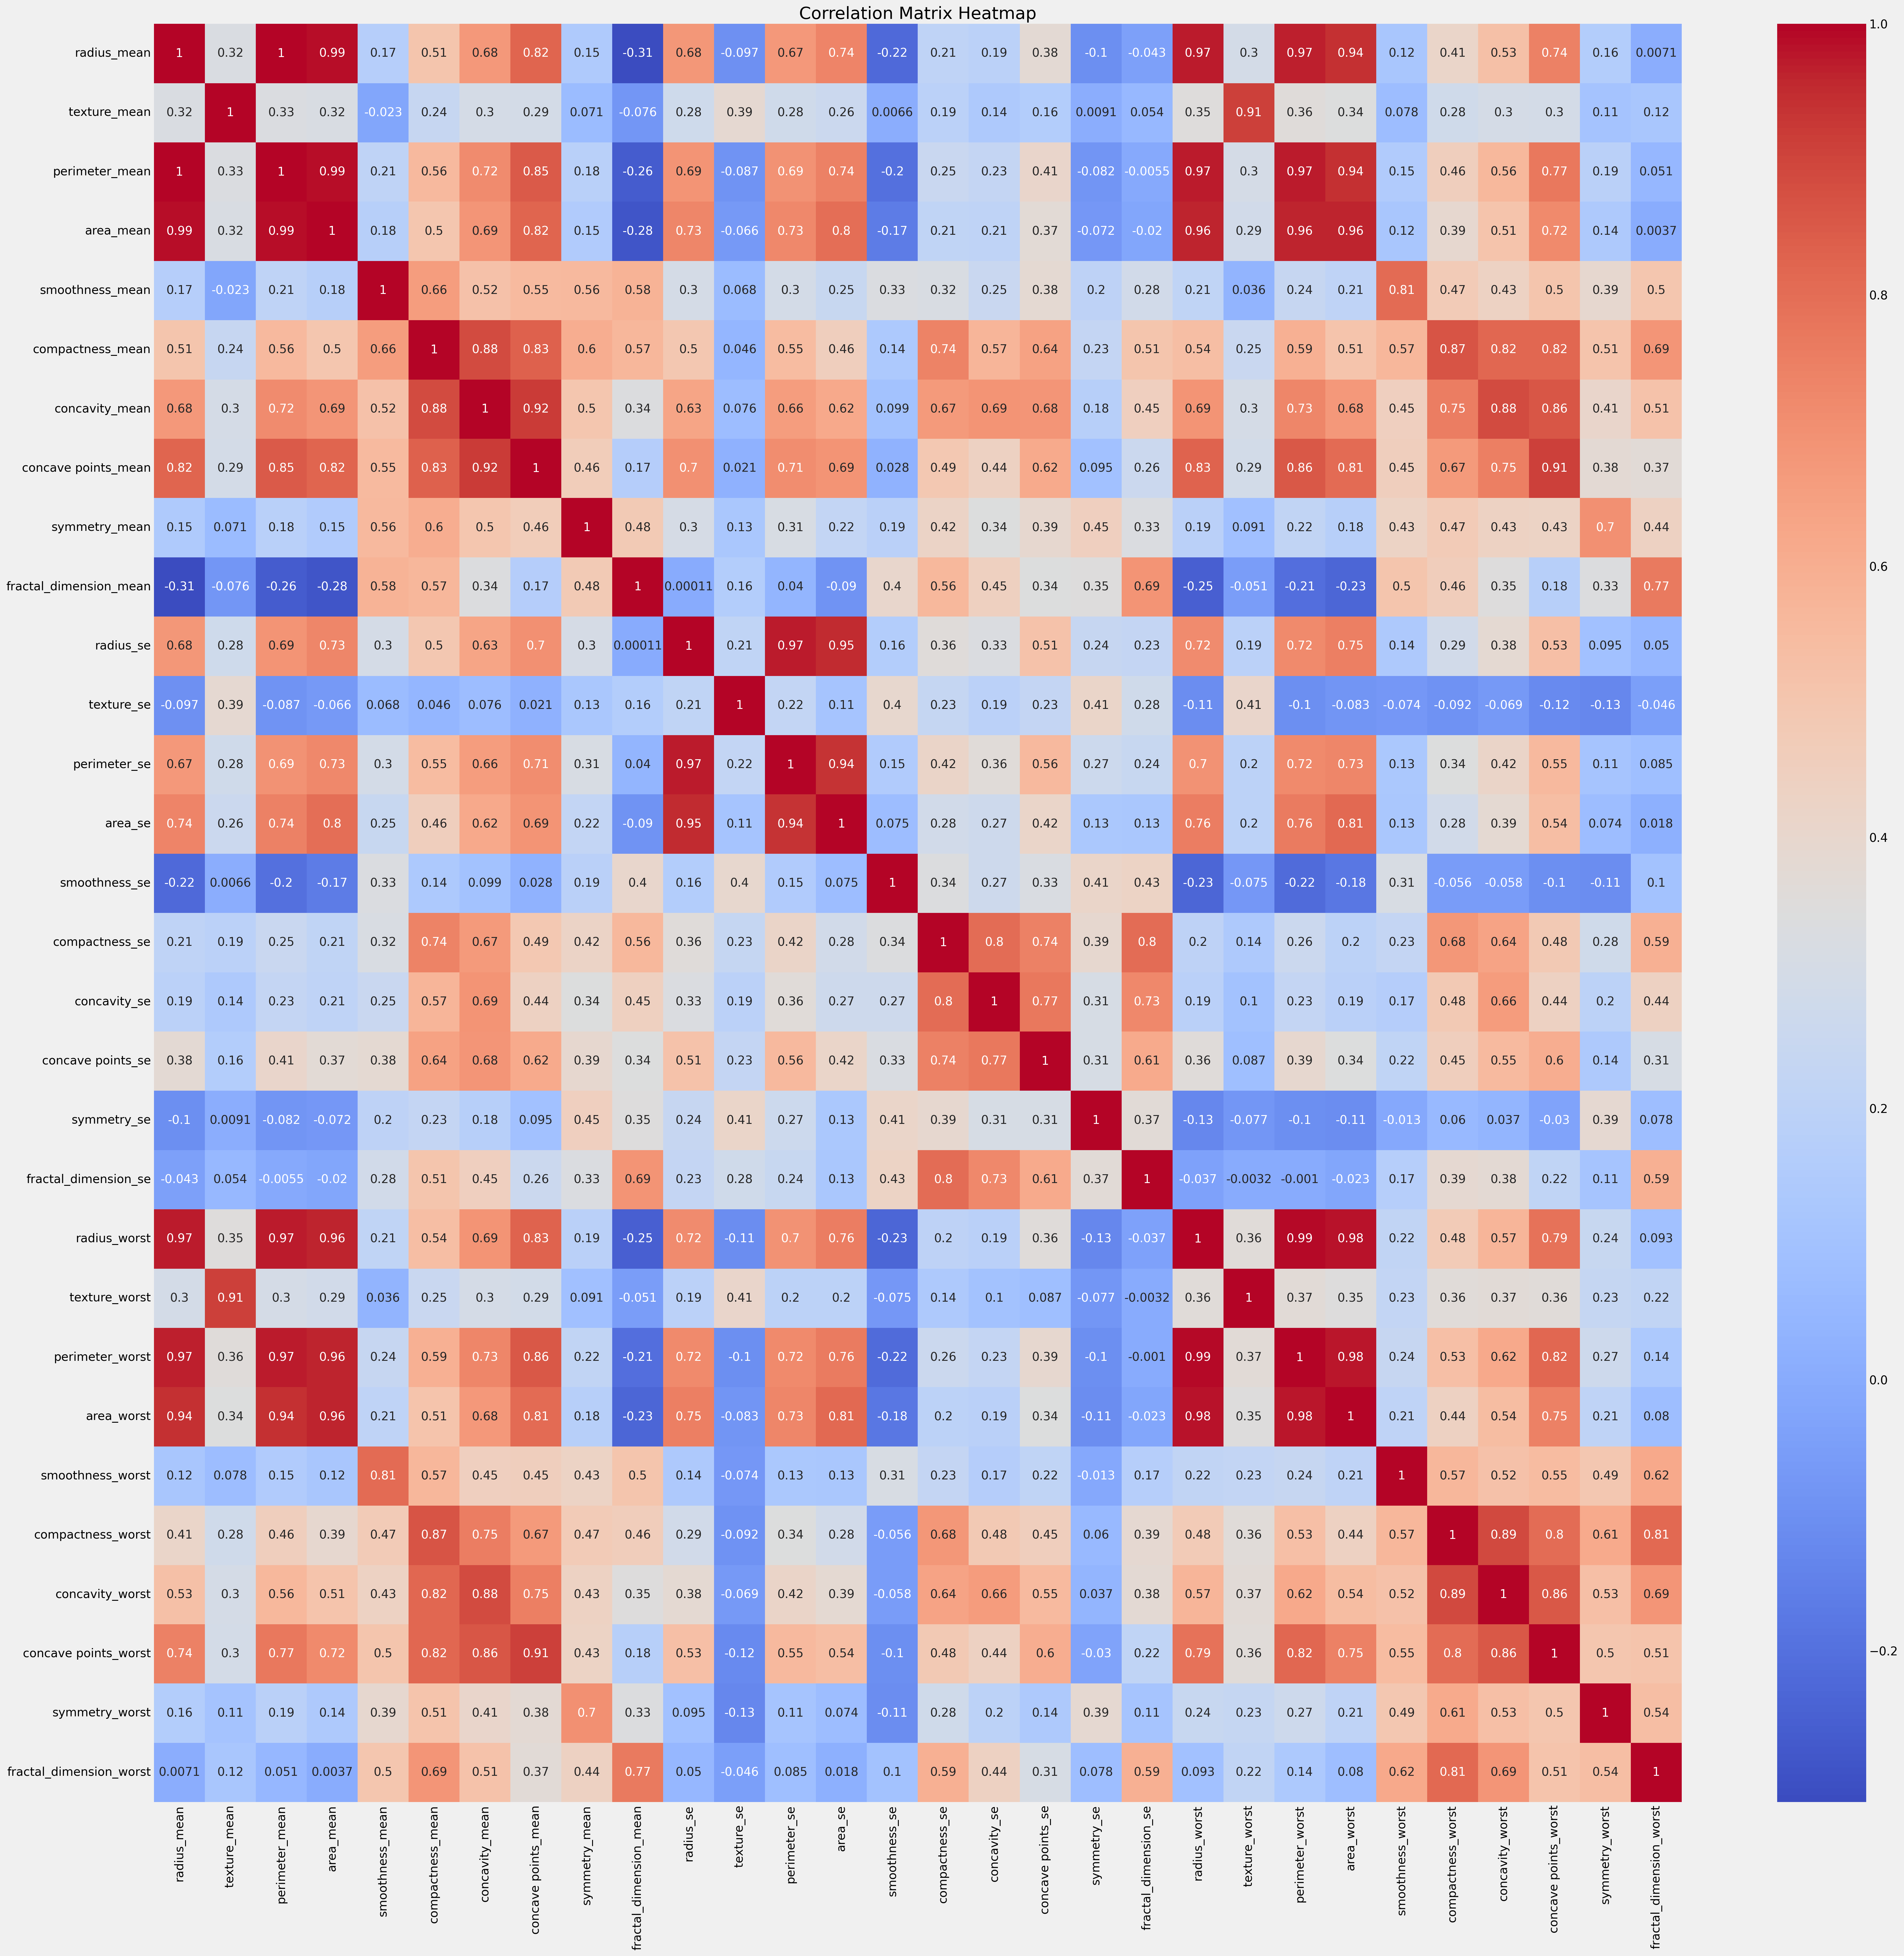

In [47]:
correlation_matrix = breast.corr(numeric_only=True)

num_features = correlation_matrix.shape[0]

cell_width = 1.2  
cell_height = 1.2 

fig_width = num_features * cell_width
fig_height = num_features * cell_height

plt.figure(figsize=(fig_width, fig_height))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [91]:
mean_columns = [col for col in breast.columns if 'mean' in col]
selected_columns = mean_columns + ['diagnosis']
breast_mean = breast[selected_columns]
breast_mean['diagnosis'] = breast_mean['diagnosis'].replace({'B': 0, 'M': 1})
breast_mean

/var/folders/fq/m3ly0qjn561g7k3q37wzfjlw0000gn/T/ipykernel_3397/1688404244.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  breast_mean['diagnosis'] = breast_mean['diagnosis'].replace({'B': 0, 'M': 1})
/var/folders/fq/m3ly0qjn561g7k3q37wzfjlw0000gn/T/ipykernel_3397/1688404244.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  breast_mean['diagnosis'] = breast_mean['diagnosis'].replace({'B': 0, 'M': 1})


radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                               
842302          17.99         10.38          122.80     1001.0   
842517          20.57         17.77          132.90     1326.0   
84300903        19.69         21.25          130.00     1203.0   
84348301        11.42         20.38           77.58      386.1   
84358402        20.29         14.34          135.10     1297.0   
...               ...           ...             ...        ...   
926424          21.56         22.39          142.00     1479.0   
926682          20.13         28.25          131.20     1261.0   
926954          16.60         28.08          108.30      858.1   
927241          20.60         29.33          140.10     1265.0   
92751            7.76         24.54           47.92      181.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760         0.30010   
842517            0.08474           0.07864         0.08690   
84300903          0.10960           0.15990         0.19740   
84348301          0.14250           0.28390         0.24140   
84358402          0.10030           0.13280         0.19800   
...                   ...               ...             ...   
926424            0.11100           0.11590         0.24390   
926682            0.09780           0.10340         0.14400   
926954            0.08455           0.10230         0.09251   
927241            0.11780           0.27700         0.35140   
92751             0.05263           0.04362         0.00000   

          concave points_mean  symmetry_mean  fractal_dimension_mean  \
id                                                                     
842302                0.14710         0.2419                 0.07871   
842517                0.07017         0.1812                 0.05667   
84300903              0.12790         0.2069                 0.05999   
84348301              0.10520         0.2597                 0.09744   
84358402              0.10430         0.1809                 0.05883   
...                       ...            ...                     ...   
926424                0.13890         0.1726                 0.05623   
926682                0.09791         0.1752                 0.05533   
926954                0.05302         0.1590                 0.05648   
927241                0.15200         0.2397                 0.07016   
92751                 0.00000         0.1587                 0.05884   

          diagnosis  
id                   
842302            1  
842517            1  
84300903          1  
84348301          1  
84358402          1  
...             ...  
926424            1  
926682            1  
926954            1  
927241            1  
92751             0  

[569 rows x 11 columns]

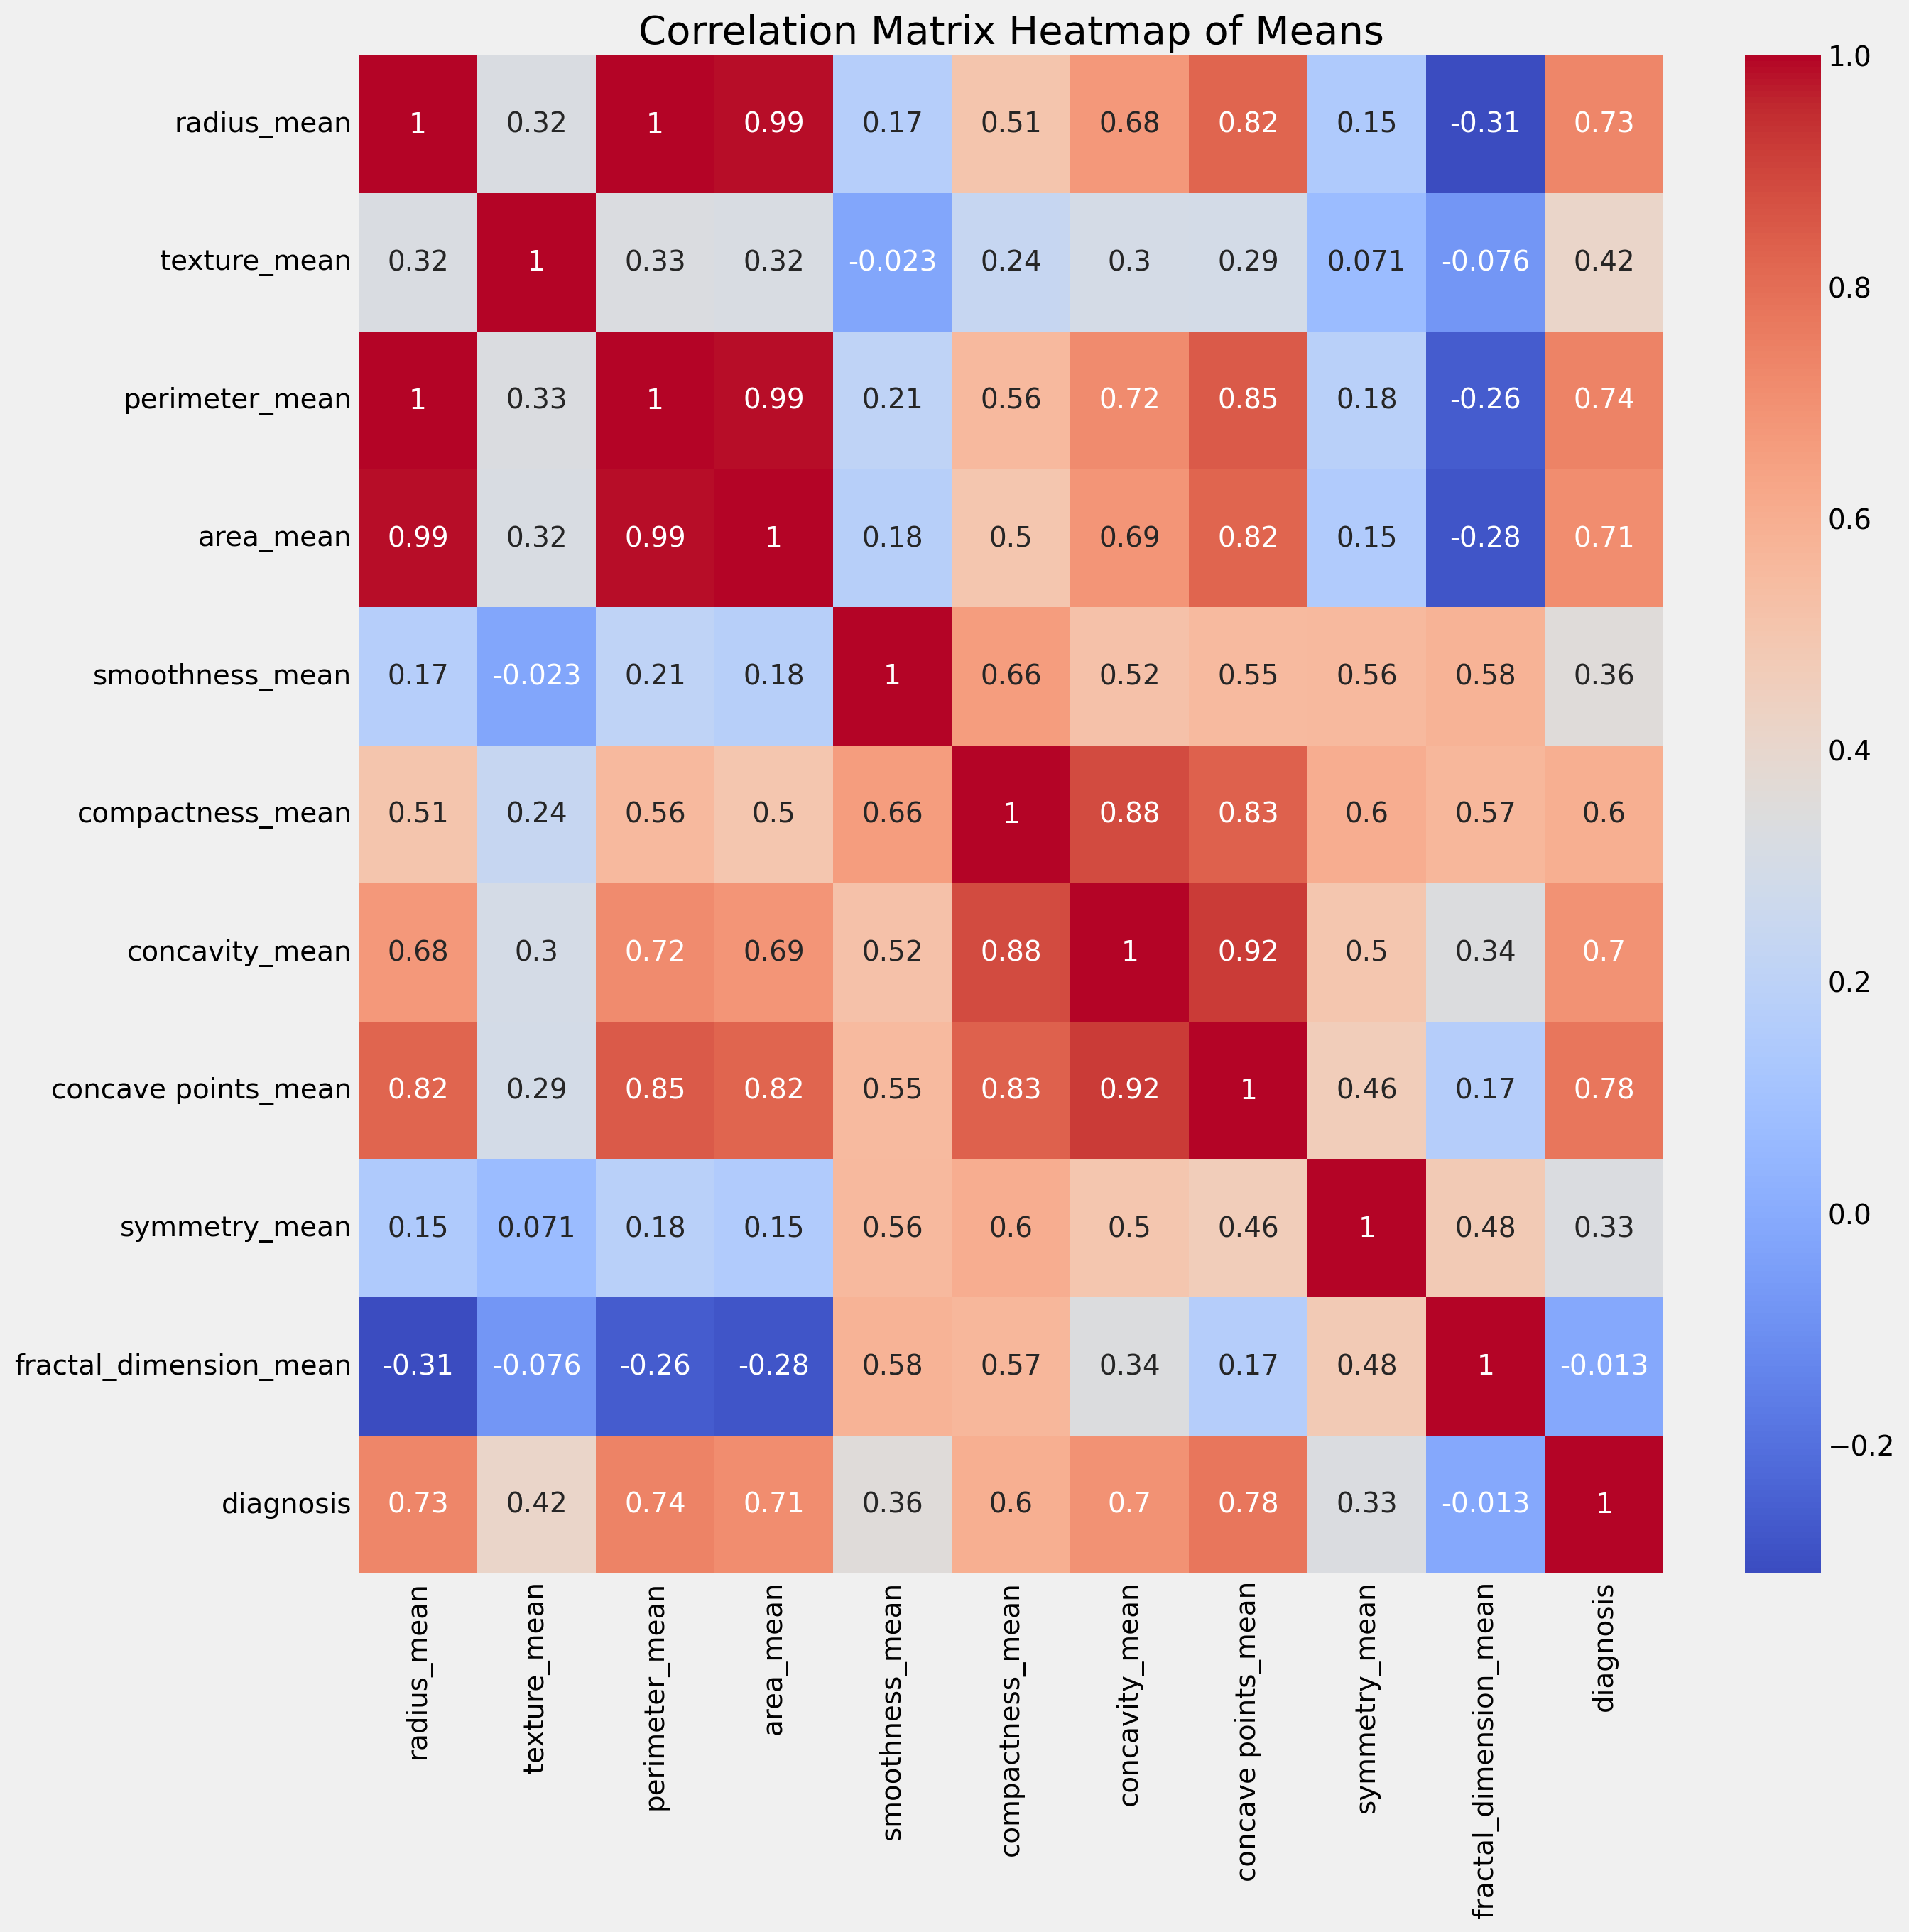

In [93]:
correlation_matrix_mean = breast_mean.corr(numeric_only=True)

num_features = correlation_matrix_mean.shape[0]

cell_width = 1.2  
cell_height = 1.2 

fig_width = num_features * cell_width
fig_height = num_features * cell_height

plt.figure(figsize=(fig_width, fig_height))
sns.heatmap(correlation_matrix_mean, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap of Means')
plt.show()

### 3. Set up the `diagnosis` variable as your target. How many classes are there?

In [95]:
# ANSWER
y = breast_mean['diagnosis']

### 4. What is the baseline accuracy?

In [97]:
# ANSWER
y.value_counts(normalize=True)

diagnosis
0    0.627417
1    0.372583
Name: proportion, dtype: float64

### 5. Choose features to be your predictor variables and set up your X.

In [103]:
# ANSWER

from scipy.stats import pointbiserialr

numeric_features = breast_mean.select_dtypes(include=['number']).columns.tolist()

numeric_features.remove('diagnosis')

for feature in numeric_features:
    corr, p_value = pointbiserialr(breast_mean[feature], breast_mean['diagnosis'])
    print(f"{feature}: correlation = {corr:.3f}, p-value = {p_value:.3f}")


radius_mean: correlation = 0.730, p-value = 0.000
texture_mean: correlation = 0.415, p-value = 0.000
perimeter_mean: correlation = 0.743, p-value = 0.000
area_mean: correlation = 0.709, p-value = 0.000
smoothness_mean: correlation = 0.359, p-value = 0.000
compactness_mean: correlation = 0.597, p-value = 0.000
concavity_mean: correlation = 0.696, p-value = 0.000
concave points_mean: correlation = 0.777, p-value = 0.000
symmetry_mean: correlation = 0.330, p-value = 0.000
fractal_dimension_mean: correlation = -0.013, p-value = 0.760


In [107]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(breast_mean[numeric_features], breast_mean['diagnosis'])
for feature, score in zip(numeric_features, mi_scores):
    print(f"{feature}: Mutual Information = {score:.3f}")

radius_mean: Mutual Information = 0.369
texture_mean: Mutual Information = 0.095
perimeter_mean: Mutual Information = 0.405
area_mean: Mutual Information = 0.363
smoothness_mean: Mutual Information = 0.080
compactness_mean: Mutual Information = 0.213
concavity_mean: Mutual Information = 0.374
concave points_mean: Mutual Information = 0.441
symmetry_mean: Mutual Information = 0.066
fractal_dimension_mean: Mutual Information = 0.006


In [111]:
from sklearn.feature_selection import f_classif

f_values, p_values = f_classif(breast_mean[numeric_features], breast_mean['diagnosis'])
for feature, f_val, p_val in zip(numeric_features, f_values, p_values):
    print(f"{feature}: F-value = {f_val:.9f}, p-value = {p_val:.9f}")

radius_mean: F-value = 646.981020979, p-value = 0.000000000
texture_mean: F-value = 118.096059345, p-value = 0.000000000
perimeter_mean: F-value = 697.235272477, p-value = 0.000000000
area_mean: F-value = 573.060746568, p-value = 0.000000000
smoothness_mean: F-value = 83.651123408, p-value = 0.000000000
compactness_mean: F-value = 313.233078568, p-value = 0.000000000
concavity_mean: F-value = 533.793126204, p-value = 0.000000000
concave points_mean: F-value = 861.676020007, p-value = 0.000000000
symmetry_mean: F-value = 69.527443500, p-value = 0.000000000
fractal_dimension_mean: F-value = 0.093459295, p-value = 0.759936804


In [117]:
X = breast_mean[['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean']]
X

radius_mean  perimeter_mean  area_mean  compactness_mean  \
id                                                                   
842302          17.99          122.80     1001.0           0.27760   
842517          20.57          132.90     1326.0           0.07864   
84300903        19.69          130.00     1203.0           0.15990   
84348301        11.42           77.58      386.1           0.28390   
84358402        20.29          135.10     1297.0           0.13280   
...               ...             ...        ...               ...   
926424          21.56          142.00     1479.0           0.11590   
926682          20.13          131.20     1261.0           0.10340   
926954          16.60          108.30      858.1           0.10230   
927241          20.60          140.10     1265.0           0.27700   
92751            7.76           47.92      181.0           0.04362   

          concavity_mean  concave points_mean  
id                                             
842302           0.30010              0.14710  
842517           0.08690              0.07017  
84300903         0.19740              0.12790  
84348301         0.24140              0.10520  
84358402         0.19800              0.10430  
...                  ...                  ...  
926424           0.24390              0.13890  
926682           0.14400              0.09791  
926954           0.09251              0.05302  
927241           0.35140              0.15200  
92751            0.00000              0.00000  

[569 rows x 6 columns]

### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [123]:
# ANSWER
# Make an instance of a KNeighborsClassifier object with 1 neighbor

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)


# fit on the unstandardized data:
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [125]:
# ANSWER
# predict the response values for the observations in X ("test the model")
# store the predicted response values
# use this to compute the accuracy

y_pred_class = knn.predict(X)
from sklearn import metrics

print(metrics.accuracy_score(y, y_pred_class))

1.0


### 8. Create a 80-20 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [127]:
# ANSWER
# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# STEP 2: train the model on the training set (using K=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# STEP 3: test the model on the testing set, and check the accuracy
y_pred_class = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

0.8333333333333334


### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [129]:
# ANSWER
# Create an instance of KNeighborsClassifier where n_neighbors = number of rows in the training data
k = X_train.shape[0]

# Fit Train Data
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)

# Print accuracy_score
print(metrics.accuracy_score(y_test, y_pred_class))

0.6228070175438597


### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

In [131]:
# ANSWER
# plot test accuracy by number of neighbors:
list(range(1, X_train.shape[0]+1))


[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [133]:
test_acc = []

for i in range(1, X_train.shape[0]+1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    test_acc.append(knn.score(X_test, y_test))

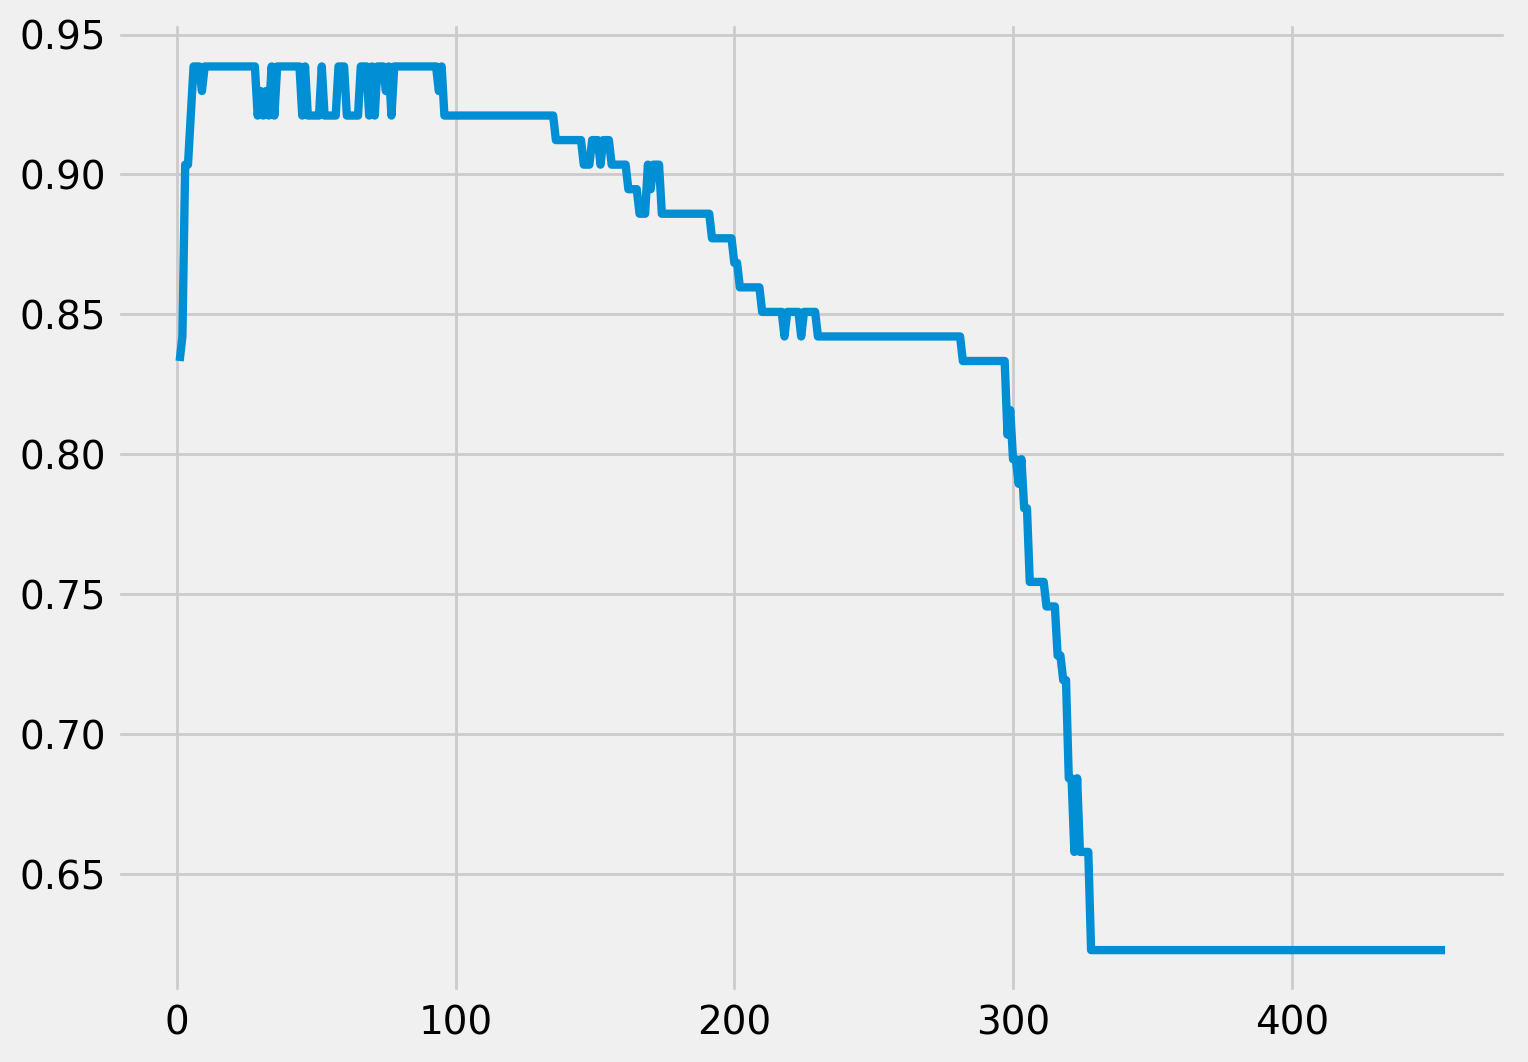

In [134]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(list(range(1, X_train.shape[0]+1)), test_acc, lw=3.)
plt.show()

### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.


In [141]:
# ANSWER

from sklearn.model_selection import cross_val_score


folds = 5
max_neighbors = np.floor(X.shape[0] - X.shape[0]/5.)

print(max_neighbors)

# calculate test accuracy for model fitted with increasing number of neighbors:
test_acc = []
for i in range(1, int(max_neighbors)):
    knn = KNeighborsClassifier(n_neighbors=i)
    test_acc.append(np.mean(cross_val_score(knn, X, y, cv=5)))

print(max(test_acc))

455.0
0.8946126377891632


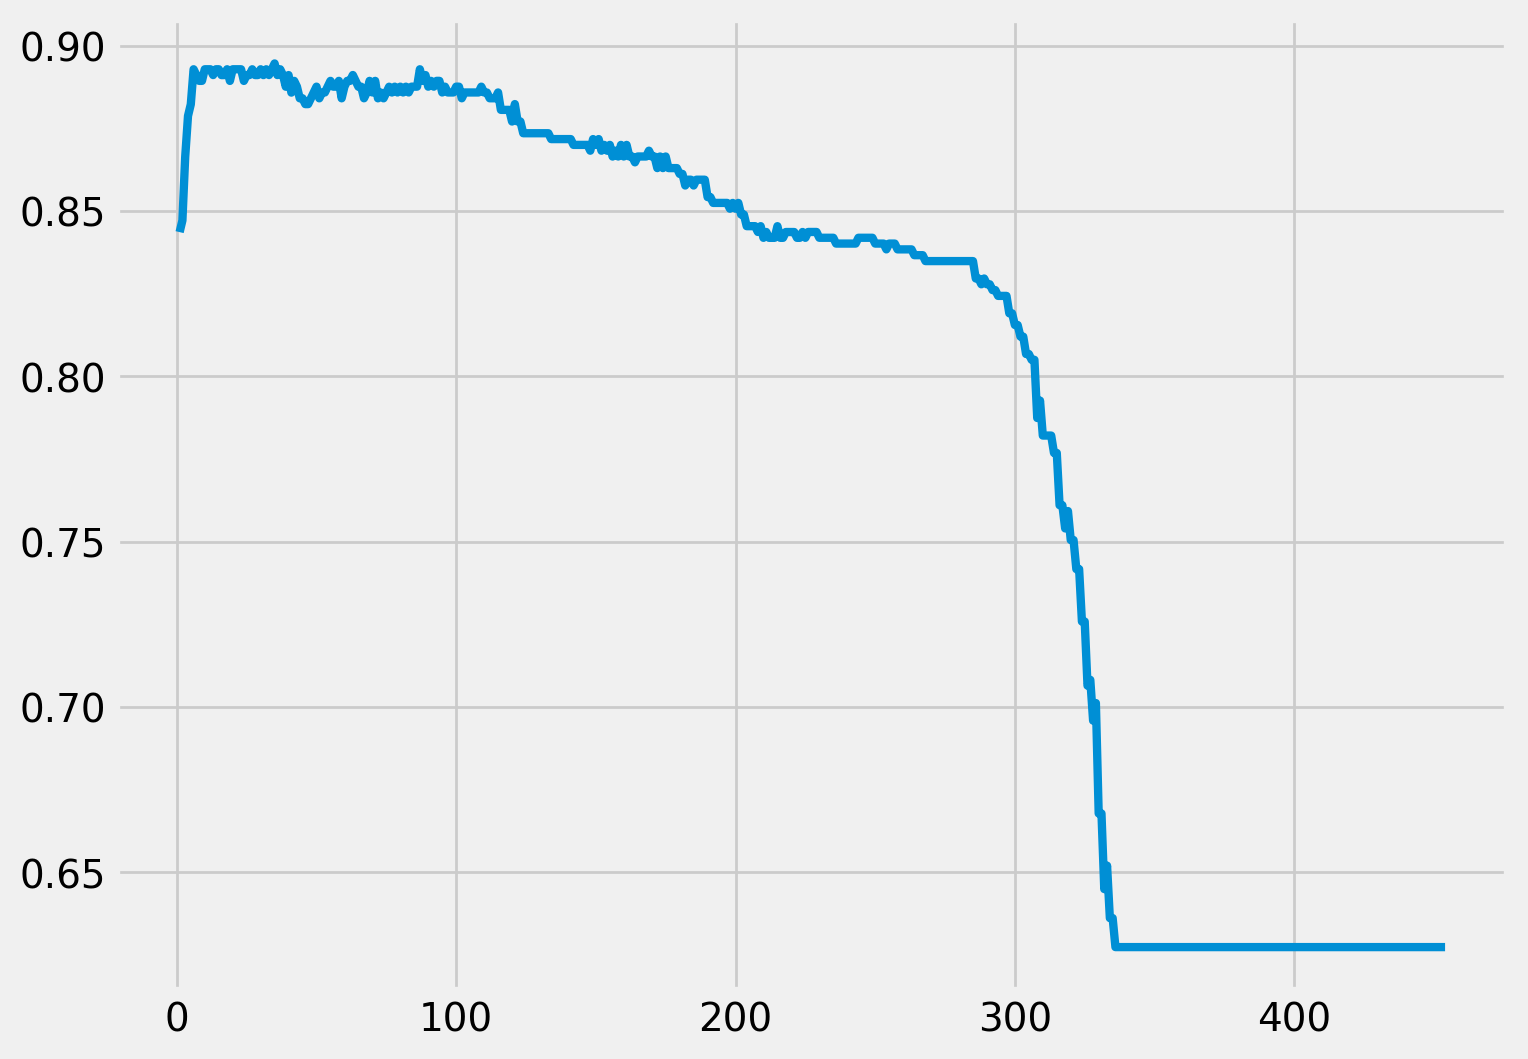

In [143]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(list(range(1, int(max_neighbors))), test_acc, lw=3.)
plt.show()

### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [145]:
# ANSWER
# Standarize X
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xs = ss.fit_transform(X)

In [147]:
# ANSWER
# plot test accuracy by number of neighbors:
test_acc_std = []
for i in range(1, int(max_neighbors)):
    knn = KNeighborsClassifier(n_neighbors=i)
    test_acc_std.append(np.mean(cross_val_score(knn, Xs, y, cv=5)))

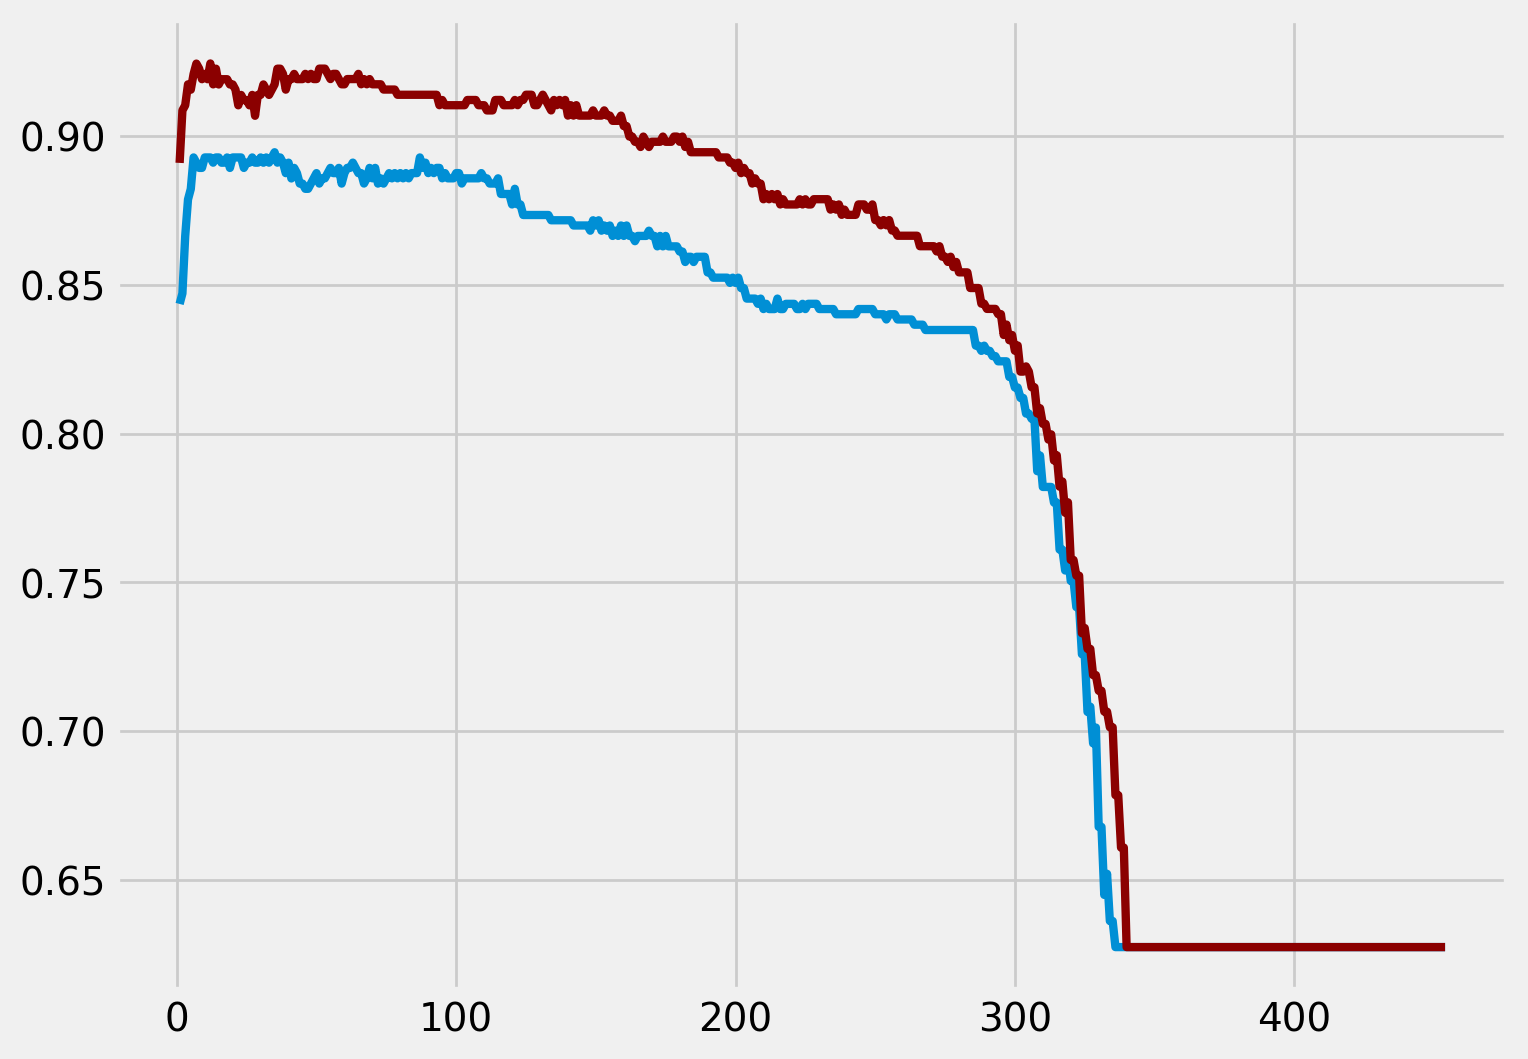

In [148]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(list(range(1, int(max_neighbors))), test_acc, lw=3.)
ax.plot(list(range(1, int(max_neighbors))), test_acc_std, lw=3., color='darkred')
plt.show()

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)



---



---



> > > > > > > > > © 2025 Institute of Data


---



---



